In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import butter, lfilter,hilbert
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
data = np.load("raw.npz",allow_pickle=True)["data"].item()
flt = np.load("processed.npz",allow_pickle=True)["data"].item()

allData = {}
for k in data.keys():
    if int(k) > 0:
        allData[k] = {}
        PAIRS = str(format(int(k), '#012b') )[2:]
        POS = [pos for pos, char in enumerate(PAIRS) if char == '1'] 
        if not POS[0]%2:
            tx = (POS[0]+2)/2
            rx = (POS[1]+1)/2
        else:
            tx = (POS[1]+2)/2
            rx = (POS[0]+1)/2
        allData[k]["signal"] = data[k]
        allData[k]["filtered"] = flt[k]
        #allData[k]["switches"] = int(k)
        allData[k]["PAIRS"] = PAIRS
        allData[k]["TX"] = tx
        allData[k]["RX"] = rx

## Checking data

* Nothing seem to appear on piezo RX1, RX2
* Paired (TX==RX) data introduce big ringing.

Text(0.5, 1.0, 'Receiving info on Piezo #5')

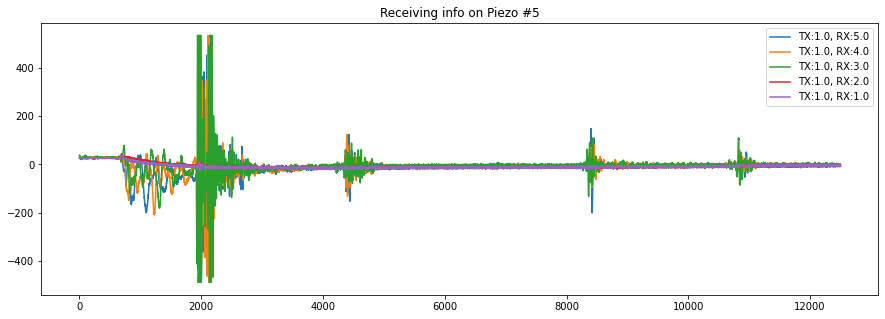

In [78]:
plt.figure(figsize=(15,5))
for k in allData.keys():
    if allData[k]["TX"] == 1:
        plt.plot(allData[k]["signal"][500:13000],label="TX:"+str(allData[k]["TX"])+", RX:"+str(allData[k]["RX"]))
plt.legend()
plt.title("Receiving info on Piezo #5")

Text(0.5, 1.0, 'Receiving info on Piezo #5')

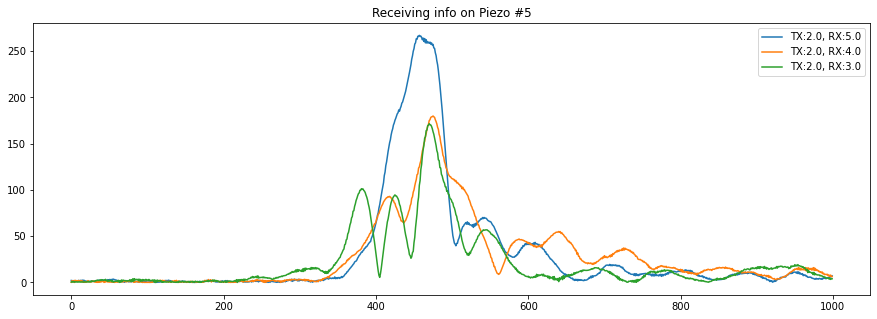

In [95]:
plt.figure(figsize=(15,5))
for k in allData.keys():
    if not( (allData[k]["RX"] == 1) or (allData[k]["RX"] == 2)):
        if allData[k]["TX"] == 2:
            plt.plot(np.abs(hilbert(allData[k]["filtered"]))[8500:9500],label="TX:"+str(allData[k]["TX"])+", RX:"+str(allData[k]["RX"]))
plt.legend()
plt.title("Receiving info on Piezo #5")

Text(0.5, 1.0, 'Receiving info on Piezo #5')

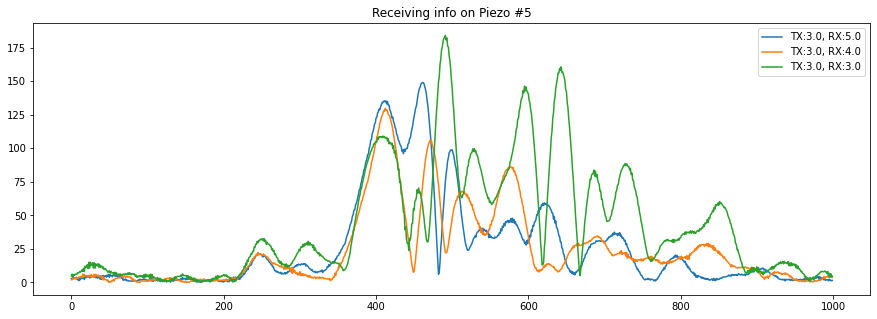

In [86]:
plt.figure(figsize=(15,5))
for k in allData.keys():
    if not( (allData[k]["RX"] == 1) or (allData[k]["RX"] == 2)):
        if allData[k]["TX"] == 3:
            plt.plot(np.abs(hilbert(allData[k]["filtered"]))[4500:5500],label="TX:"+str(allData[k]["TX"])+", RX:"+str(allData[k]["RX"]))
plt.legend()
plt.title("Receiving info on Piezo #5")